## TRABAJO DE TITULACIÓN   - Grupo 8

 * Carlos Guzmán
 * Diego Salazar
 * Jonathan Barrionuevo
 * Nicole Molina

## FASE 1 - PREPARACIÓN DEL DATASET

Para este trabajo tenemos un Dataset de 1900 entradas, con varias características de ellas seleccionaremos las que se consideran relevantes para un estudio de clasificación (identificación de tendencias) siendo este el objetivo del proyecto final

### Carga del Dataset desde carpeta Dataset

In [3]:
import pandas as pd
import numpy as np

# Cargar el archivo CSV
dataset_path = '/workspace/Dataset/grupo8_dataset.csv'
df = pd.read_csv(dataset_path)

# Mostrar las primeras filas para verificar la carga
df.head()


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Fairbrass A.J.; O’Sullivan A.; Campbell J.; Ek...,"Fairbrass, A.J. (47060944600); O’Sullivan, A. ...",47060944600; 59013830500; 57211325039; 7004909341,The SDGs Provide Limited Evidence That Environ...,2024,Earth's Future,12,5,e2024EF004451,NaN,...,NaN,NaN,NaN,English,Earth's Futur.,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85192085426
1,Wang X.; Xiong J.; Wang J.; Liu M.; Zhang J.,"Wang, Xinbin (57345638600); Xiong, Jianxin (49...",57345638600; 49362372300; 58164251700; 5880638...,Spatiotemporal evolution and driving factors o...,2024,Ecological Informatics,80,NaN,102459,NaN,...,NaN,NaN,NaN,English,Ecol. Informatics,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85182008582
2,Wang J.; Yi L.; Chen L.; Hou Y.; Zhang Q.; Yan...,"Wang, Jiayuan (58166891700); Yi, Lin (36520066...",58166891700; 36520066100; 57199842995; 5911691...,"Coupling and Coordination between Tourism, the...",2024,Sustainability (Switzerland),16,9,3657,NaN,...,NaN,NaN,NaN,English,Sustainability,Article,Final,NaN,Scopus,2-s2.0-85192787015
3,Meng L.; Yan F.; Fang Q.; Si W.,"Meng, Lin (57880239400); Yan, Fengjuan (591710...",57880239400; 59171037200; 59170186200; 5779327...,Research on the Educational Tourism Developmen...,2024,Sustainability (Switzerland),16,11,4647,NaN,...,NaN,NaN,NaN,English,Sustainability,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85195834842
4,Chen Z.; Ye C.; Yang H.; Ye P.; Xie Y.; Ding Z.,"Chen, Zhengyan (58817236900); Ye, Cuicui (5913...",58817236900; 59136601200; 57929161700; 5913577...,Exploring the impact of seasonal forest landsc...,2024,Ecological Indicators,163,NaN,112115,NaN,...,NaN,NaN,NaN,English,Ecol. Indic.,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85193709855


### Limpieza de Datos

Se debe realizar una limpieza de los datos, dado que gran parte de ellos no presentan relevancia para el análisis que debemos realizar, para ello nos quedaremos únicamente con las columnas:
* Author(s) ID
* Title
* Year
* Abstract
* Author Keywords
* Index Keywords
* Language of Original Document
* Document Type

In [4]:
# Seleccionar solo las columnas necesarias
df_cleaned = df[['Author(s) ID', 'Title', 'Year', 'Abstract', 'Author Keywords', 'Index Keywords', 'Language of Original Document', 'Document Type']]

# Mostrar las primeras 5 filas del DataFrame limpiado
df_cleaned.head()

,Author(s) ID,Title,Year,Abstract,Author Keywords,Index Keywords,Language of Original Document,Document Type
0,47060944600; 59013830500; 57211325039; 7004909341,The SDGs Provide Limited Evidence That Environ...,2024,"The Sustainable Development Goals (SDGs), aimi...",biodiversity; environment; human; indicators; ...,biodiversity; bioindicator; ecosystem health; ...,English,Article
1,57345638600; 49362372300; 58164251700; 5880638...,Spatiotemporal evolution and driving factors o...,2024,Tourism ecological adaptation (TEA) offers a n...,Dongting Lake area; Driving factors; Spatiotem...,China; Dongting Lake; Hunan; environmental imp...,English,Article
2,58166891700; 36520066100; 57199842995; 5911691...,"Coupling and Coordination between Tourism, the...",2024,"Studying the relationships among tourism, the ...",carbon emissions; coupling coordination; susta...,China; Lhasa; Qinghai-Xizang Plateau; Xizang; ...,English,Article
3,57880239400; 59171037200; 59170186200; 5779327...,Research on the Educational Tourism Developmen...,2024,Combining the Intangible Cultural Heritage and...,China; development suitability evaluation; edu...,China; Shandong; cultural heritage; factor ana...,English,Article
4,58817236900; 59136601200; 57929161700; 5913577...,Exploring the impact of seasonal forest landsc...,2024,This study investigates the emotional changes ...,Forest landscape; Machine learning; National f...,Forestry; Semantics; Sentiment analysis; Susta...,English,Article


Una vez hemos limpiado el Dataset, deberemos proceder con la reducción de dimensionalidad de la columnas de Keywords.

La razón por la que unificamos las columnas 'Author Keywords' y 'Index Keywords' en una sola columna de 'Keywords' es para:

* Eliminar redundancias: Tener dos columnas separadas para las palabras clave puede generar duplicación innecesaria de información. Al unificar ambas columnas y eliminar los duplicados, reducimos la dimensionalidad del dataset sin perder información valiosa.

* Simplificar el análisis: Al consolidar las palabras clave en una sola columna, el análisis posterior y el preprocesamiento se vuelven más manejables, ya que los modelos de machine learning pueden trabajar más fácilmente con una única fuente de palabras clave.

* Mejora de la representación de los datos: Esta fusión proporciona una representación más precisa de las palabras clave asociadas a cada documento, evitando posibles confusiones o inconsistencias en el análisis.

In [5]:
# Crear una copia del DataFrame original
df_cleaned = df_cleaned.copy()

# Rellenar valores nulos de 'Author Keywords' e 'Index Keywords'
df_cleaned['Author Keywords'] = df_cleaned['Author Keywords'].fillna('')
df_cleaned['Index Keywords'] = df_cleaned['Index Keywords'].fillna('')

# Crear la nueva columna 'Keywords' sin valores duplicados y ordenada alfabéticamente
df_cleaned['Keywords'] = df_cleaned.apply(
    lambda row: ', '.join(sorted(set((row['Author Keywords'] + ', ' + row['Index Keywords']).split(', ')))), axis=1
)

# Seleccionar las columnas para el DataFrame reducido
df_reduced = df_cleaned[['Author(s) ID', 'Title', 'Year', 'Abstract', 'Keywords', 'Language of Original Document', 'Document Type']]

# Mostrar las primeras filas del DataFrame reducido
df_reduced.head()


,Author(s) ID,Title,Year,Abstract,Keywords,Language of Original Document,Document Type
0,47060944600; 59013830500; 57211325039; 7004909341,The SDGs Provide Limited Evidence That Environ...,2024,"The Sustainable Development Goals (SDGs), aimi...",biodiversity; bioindicator; ecosystem health; ...,English,Article
1,57345638600; 49362372300; 58164251700; 5880638...,Spatiotemporal evolution and driving factors o...,2024,Tourism ecological adaptation (TEA) offers a n...,China; Dongting Lake; Hunan; environmental imp...,English,Article
2,58166891700; 36520066100; 57199842995; 5911691...,"Coupling and Coordination between Tourism, the...",2024,"Studying the relationships among tourism, the ...",China; Lhasa; Qinghai-Xizang Plateau; Xizang; ...,English,Article
3,57880239400; 59171037200; 59170186200; 5779327...,Research on the Educational Tourism Developmen...,2024,Combining the Intangible Cultural Heritage and...,China; Shandong; cultural heritage; factor ana...,English,Article
4,58817236900; 59136601200; 57929161700; 5913577...,Exploring the impact of seasonal forest landsc...,2024,This study investigates the emotional changes ...,Forest landscape; Machine learning; National f...,English,Article


#### Tratamiento de datos Nulos

In [6]:
# Calcular los valores nulos por columna
nulos_por_columna = df_reduced.isnull().sum()

# Crear un DataFrame para mostrar los valores nulos
nulos_df = pd.DataFrame({
    'Column': nulos_por_columna.index,
    'Null Values': nulos_por_columna.values
})

# Mostrar el DataFrame de valores nulos
nulos_df

,Column,Null Values
0,Author(s) ID,31
1,Title,0
2,Year,0
3,Abstract,0
4,Keywords,0
5,Language of Original Document,0
6,Document Type,0


Verificamos que tenemos 31 artículos sin ID de autor, por lo cuál se realiza el tratamiento de estos con la etiqueta noID

In [7]:
df_reduced.loc[:, 'Author(s) ID'] = df_reduced['Author(s) ID'].fillna('NoID')

# Verificar que los valores nulos se han reemplazado correctamente
print(df_reduced.isnull().sum())

Author(s) ID                     0
Title                            0
Year                             0
Abstract                         0
Keywords                         0
Language of Original Document    0
Document Type                    0
dtype: int64


## FASE 2 - EXPLORACIÓN INICIAL



En esta sección, realizaremos una **exploración inicial** del dataset para entender mejor la distribución y las características de los datos antes de proceder con el preprocesamiento y la construcción del modelo de clasificación.

Este análisis incluye:

1. **Distribución de Artículos por Año**: Exploraremos la cantidad de artículos publicados en cada año para observar posibles patrones o incrementos en la producción académica sobre turismo.

2. **Distribución de la Cantidad de Palabras en los Abstracts**: Analizaremos la longitud de los abstracts en términos de cantidad de palabras. Esto es relevante para el modelo de RNN, ya que nos permitirá definir el tamaño de las secuencias de entrada.

3. **Distribución de Tipos de Documentos**: Observaremos los diferentes tipos de documentos en el dataset para identificar qué tipos predominan, lo cual puede ser útil en el análisis y filtrado de los datos.

4. **Distribución de Idiomas de los Documentos**: Verificaremos los idiomas en los que están escritos los artículos para asegurar que la mayoría esté en un idioma adecuado para el procesamiento (por ejemplo, inglés).

5. **Análisis de Frecuencia de Palabras Clave**: Realizaremos un análisis de las palabras clave más comunes para identificar los temas y términos más frecuentes en la investigación sobre turismo.

Estos gráficos y análisis nos proporcionarán una **visión general del dataset** y nos ayudarán a tomar decisiones informadas en los siguientes pasos de preprocesamiento y entrenamiento del modelo.


### Análisis 1: Distribución de artículos por año

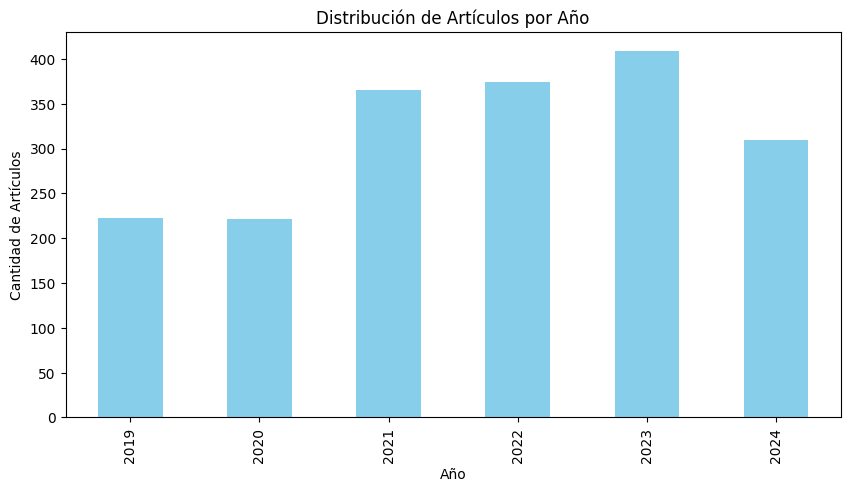

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
df_reduced['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de Artículos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Artículos')
plt.show()

- **Tendencia General**: Observamos un aumento en la cantidad de artículos desde el año 2019 hasta el 2023, lo cual indica un creciente interés en la temática de investigación.
  
- **Pico de Publicaciones en 2023**: El año 2023 muestra la mayor cantidad de publicaciones, lo que podría sugerir que el tema alcanzó un punto alto de relevancia en la comunidad académica en ese año. Esto también podría estar relacionado con eventos globales, como políticas sostenibles, cambios en el turismo post-pandemia, o avances en la tecnología de análisis de datos en turismo.
  
- **Descenso en 2024**: Aunque el año 2024 aún no ha finalizado, la gráfica muestra una disminución en la cantidad de publicaciones. Esto puede deberse a varios factores:
  
  - **Datos Parciales**: Es posible que los datos de 2024 aún no estén completos, especialmente si la recopilación se realizó en los primeros meses del año.
  - **Desplazamiento de Enfoque**: Puede ser que el interés en el tema esté disminuyendo, o que los investigadores estén explorando nuevas áreas relacionadas.

- **Impacto de la Pandemia (2020-2021)**: Los años 2020 y 2021 muestran una ligera disminución en la cantidad de publicaciones, lo cual podría estar relacionado con la pandemia de COVID-19, que afectó significativamente la investigación y publicación académica. Durante este período, muchos sectores, incluido el turismo, enfrentaron desafíos que pudieron haber impactado la producción académica.


### Análisis 2: Distribución de longitud de abstracts

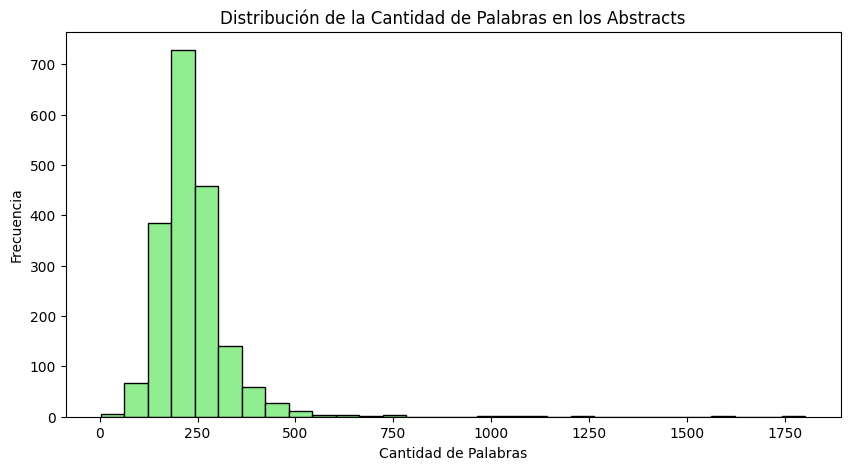

In [15]:
df_reduced.loc[:, 'Abstract Length'] = df_reduced['Abstract'].apply(lambda x: len(str(x).split()))

# Visualización
plt.figure(figsize=(10, 5))
df_reduced['Abstract Length'].plot(kind='hist', bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribución de la Cantidad de Palabras en los Abstracts')
plt.xlabel('Cantidad de Palabras')
plt.ylabel('Frecuencia')
plt.show()

- **Tendencia General**: La mayoría de los abstracts contienen entre 150 y 350 palabras. Esto sugiere un estándar en la longitud de los resúmenes, posiblemente determinado por los requisitos de las revistas o conferencias académicas.

- **Pico en la Frecuencia de Palabras**: Observamos un pico en la frecuencia entre 200 y 250 palabras. Esto indica que muchos autores eligen mantener sus resúmenes en ese rango de palabras, lo cual puede responder a normas editoriales o a un intento de sintetizar la investigación de manera concisa y efectiva.

- **Distribución Asimétrica**: La distribución tiene una cola hacia la derecha, lo cual significa que aunque la mayoría de los abstracts se encuentran en el rango estándar, existen algunos con una mayor cantidad de palabras, llegando incluso a superar las 1000. Estos casos podrían ser excepcionales y responder a investigaciones con mayores detalles, múltiples hipótesis o explicaciones complejas.

- **Conclusión**: La distribución de longitud de los abstracts en este análisis sugiere que la comunidad académica en el campo tiende a producir resúmenes que son concisos y que cumplen con los límites de palabras recomendados, permitiendo una rápida comprensión de los objetivos y resultados de la investigación.


###  Análisis 3: Distribución de tipos de documentos

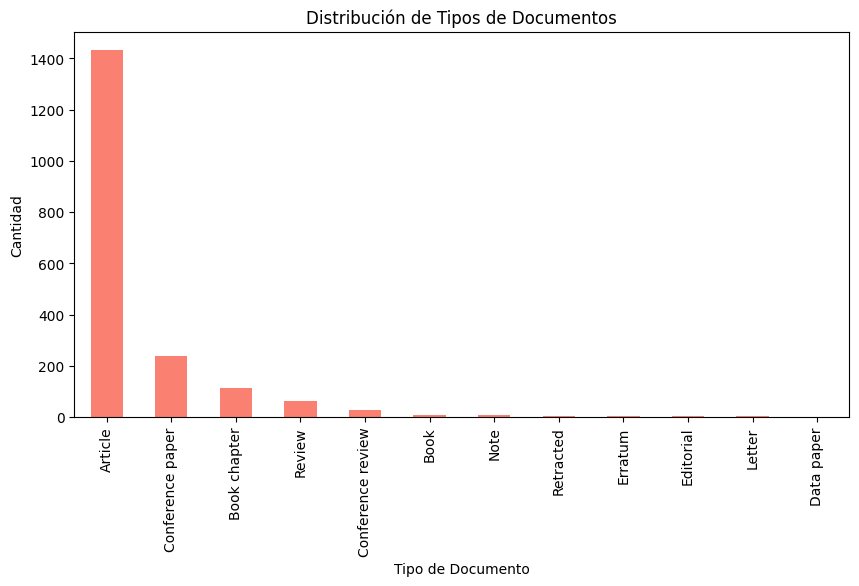

In [16]:
plt.figure(figsize=(10, 5))
df_reduced['Document Type'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribución de Tipos de Documentos')
plt.xlabel('Tipo de Documento')
plt.ylabel('Cantidad')
plt.show()

### Análisis de la Distribución de Tipos de Documentos

- **Distribución General**: La mayoría de los documentos en el dataset son artículos ("Article"), con una gran diferencia frente a otros tipos de documentos como "Conference paper" y "Book chapter". Los artículos representan la clase más dominante, superando significativamente en cantidad a todas las demás categorías.

- **Desbalance de Clases**: Existe un fuerte desbalance de clases, lo cual podría afectar el entrenamiento de modelos de aprendizaje automático si se utiliza esta clasificación. Los modelos tienden a inclinarse hacia la clase mayoritaria, reduciendo su capacidad para predecir correctamente las clases menos representadas.

### Posibles Estrategias para Abordar el Desbalance

1. **Submuestreo de la Clase Mayoritaria**: Reducir la cantidad de artículos ("Article") en el dataset, seleccionando aleatoriamente una muestra de estos, para equilibrar su proporción con las otras categorías.

2. **Aumento de las Clases Minoritarias**: Utilizar técnicas de aumento de datos, como generación sintética de datos o duplicación de documentos de las clases menos representadas, para incrementar su proporción.

3. **Pesos de Clase en Modelos de ML**: Ajustar los pesos de las clases en función de su distribución para penalizar errores en las clases minoritarias de manera más significativa. Esto obligaría al modelo a prestar más atención a las clases menos comunes.

4. **Agrupación de Clases**: Otra opción podría ser combinar algunas de las clases menos comunes en una categoría única de "Otros" para simplificar el análisis y reducir el impacto del desbalance extremo.




### Análisis 4: Distribución de idiomas

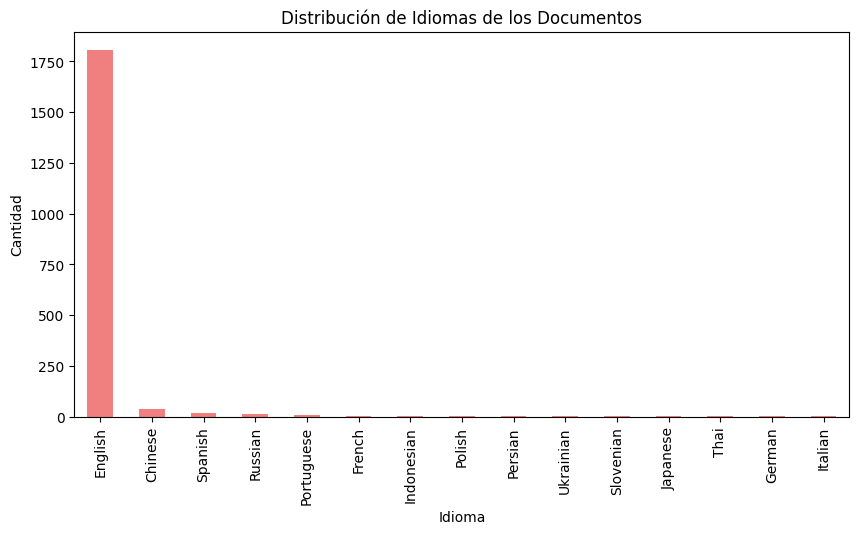

In [17]:
plt.figure(figsize=(10, 5))
df_reduced['Language of Original Document'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribución de Idiomas de los Documentos')
plt.xlabel('Idioma')
plt.ylabel('Cantidad')
plt.show()


### Análisis de la Distribución de Idiomas en los Documentos

- **Distribución General**: La gran mayoría de los documentos están en inglés, lo que indica que el inglés es el idioma dominante en el campo de investigación. Otros idiomas, como el chino y el español, tienen una representación significativamente menor, seguidos por otros idiomas con aún menor frecuencia.

La predominancia del inglés como idioma de publicación puede sesgar los resultados del análisis hacia una perspectiva cultural anglófona. 


### Análisis 5: Frecuencia de palabras clave

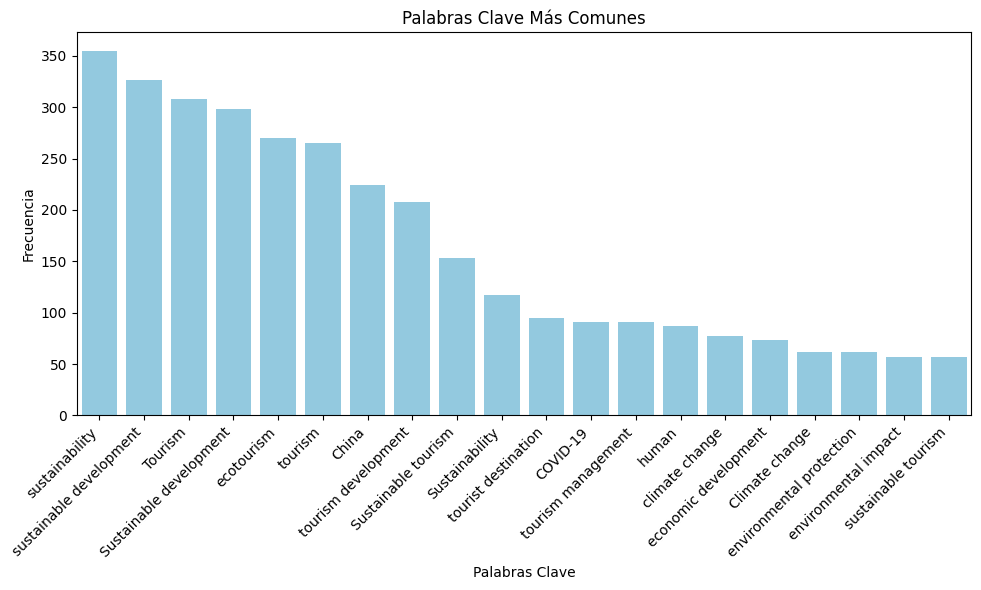

In [20]:
# Filtrar palabras clave no válidas (vacías o solo espacios)
all_keywords = df_reduced['Keywords'].str.split(';').explode().str.strip()
all_keywords = all_keywords[all_keywords != ""]  # Remover palabras clave vacías

# Contar la frecuencia de cada palabra clave
df_keywords = all_keywords.value_counts().reset_index()
df_keywords.columns = ['Palabra Clave', 'Frecuencia']

# Filtrar para mostrar solo las N palabras clave más comunes
top_keywords = df_keywords.head(20)  # Ajusta el número según necesites

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=top_keywords, x='Palabra Clave', y='Frecuencia', color='skyblue')

# Rotar etiquetas en el eje x para mejorar legibilidad
plt.xticks(rotation=45, ha="right")
plt.xlabel("Palabras Clave")
plt.ylabel("Frecuencia")
plt.title("Palabras Clave Más Comunes")
plt.tight_layout()
plt.show()

##### Análisis de las Palabras Clave Más Comunes

- **Frecuencia y Temáticas Predominantes**: Las palabras clave más frecuentes reflejan temas relacionados con la **sostenibilidad**, **desarrollo sostenible**, y **turismo**. Esto sugiere un fuerte enfoque en la intersección entre el turismo y la sostenibilidad, un área relevante en investigaciones recientes debido al impacto ambiental y social del turismo en diversas regiones.

- **Presencia de Bigrama**: Observamos la repetición de términos como "sustainable development" y "tourism development" en varias configuraciones de palabras clave, lo que indica la prominencia de estas combinaciones en la literatura revisada. Esto también puede reflejar una tendencia en el uso de terminología consistente en el campo.

- **Distribución Geográfica y Específica**: Palabras como **China** y **COVID-19** también figuran entre las más comunes, señalando temas de interés geográfico y la reciente pandemia como factores importantes en los estudios de turismo.

##### Estrategias para Profundizar el Análisis

1. **Agrupación Semántica**: Agrupar términos similares, como aquellos relacionados con sostenibilidad y turismo, puede ayudar a identificar patrones más amplios en las investigaciones y reducir la redundancia en el análisis de palabras clave.

2. **Análisis de Bigrama y Trigrama**: Debido a la repetición de temas en combinaciones de palabras, realizar un análisis de bigramas y trigramas puede ofrecer una mejor comprensión de las relaciones entre conceptos clave, identificando términos que frecuentemente aparecen juntos y formando temas más amplios.

3. **Segmentación Temporal o Geográfica**: Investigar si ciertas palabras clave o combinaciones cambian con el tiempo o por región puede ser útil para comprender la evolución de las investigaciones y la relevancia de temas específicos en diferentes contextos.

##### Conclusión
La distribución de las palabras clave indica un foco de investigación en temas de sostenibilidad en el turismo, con un interés en el impacto regional y en fenómenos recientes como el COVID-19. Este análisis de palabras clave es útil para identificar tendencias temáticas, pero puede ser enriquecido con una agrupación más avanzada y análisis de bigramas.


#### Análisis 5.1: Análisis de Bigramas 

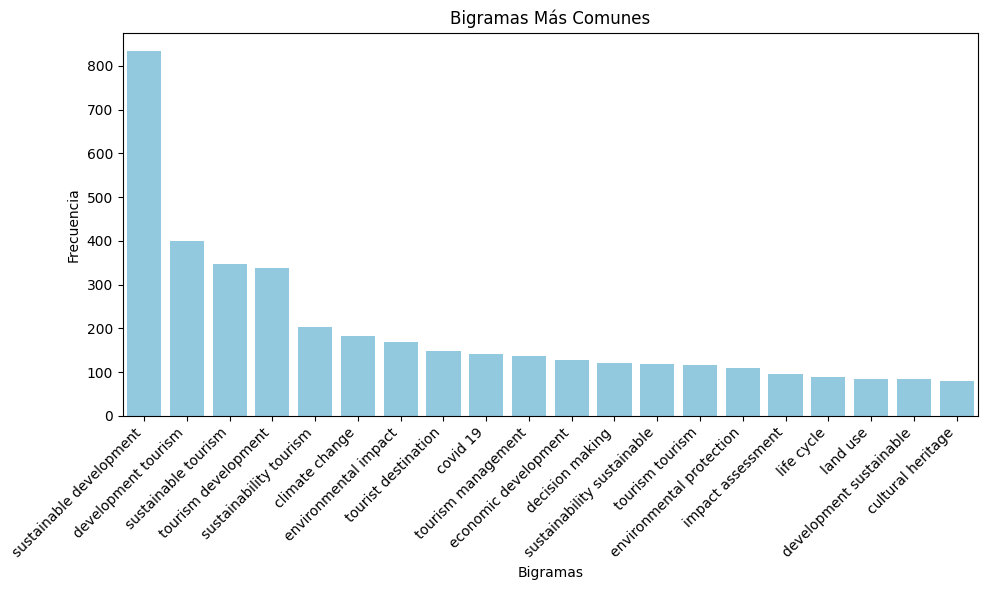

In [21]:
from sklearn.feature_extraction.text import CountVectorizer


text_data = df_reduced['Keywords'].dropna().values

# Configurar CountVectorizer para bigramas
vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_matrix = vectorizer.fit_transform(text_data)

# Obtener el conteo de bigramas
bigram_counts = bigram_matrix.sum(axis=0).A1
bigram_words = vectorizer.get_feature_names_out()

# Crear un DataFrame de bigramas y su frecuencia
bigram_df = pd.DataFrame({'Bigrama': bigram_words, 'Frecuencia': bigram_counts})
bigram_df = bigram_df.sort_values(by='Frecuencia', ascending=False).head(20)

# Visualizar los bigramas más comunes
plt.figure(figsize=(10, 6))
sns.barplot(data=bigram_df, x='Bigrama', y='Frecuencia', color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Bigramas")
plt.ylabel("Frecuencia")
plt.title("Bigramas Más Comunes")
plt.tight_layout()
plt.show()



- **Frecuencia y Temas Recurrentes**: El bigrama "sustainable development" es el más frecuente, seguido por otros bigramas relacionados como "development tourism" y "sustainable tourism". Esto subraya el enfoque en la sostenibilidad dentro del contexto del desarrollo y el turismo, lo cual es consistente con las tendencias identificadas en palabras clave individuales.

- **Relación entre Conceptos Clave**: La presencia de bigramas como "climate change", "environmental impact", y "tourism management" muestra cómo estos términos se entrelazan en la investigación académica. Estos bigramas indican que los estudios no solo se centran en la sostenibilidad en sí, sino en su interrelación con el cambio climático, el manejo del impacto ambiental y la gestión turística.

- **Evolución y Enfoque Temático**: Términos como "covid 19" y "economic development" reflejan temas actuales y áreas de enfoque reciente. La pandemia y el desarrollo económico son factores que han cobrado relevancia en los estudios de turismo en los últimos años, resaltando el impacto de eventos globales en la industria.

- **Desafíos de Análisis y Agrupación**: La alta frecuencia de ciertos bigramas relacionados con sostenibilidad podría implicar redundancia en los términos, lo cual sugiere la necesidad de agrupar o normalizar términos similares en futuras investigaciones para reducir la repetición y obtener una visión más clara de los temas predominantes.

**Estrategias para el Análisis**

1. **Análisis de Trigramas**: Ampliar el análisis a trigramas permitiría entender mejor las relaciones entre temas, especialmente en combinaciones complejas como "sustainable tourism development" o "environmental impact assessment".

2. **Segmentación Temática**: Dado el fuerte enfoque en temas de sostenibilidad y cambio climático, se podrían crear subgrupos temáticos para explorar cada área en profundidad.

3. **Análisis Temporal**: Realizar un análisis temporal sobre la frecuencia de estos bigramas podría revelar tendencias emergentes o cambios en el enfoque de la investigación a lo largo del tiempo.

**Conclusión**
El análisis de bigramas confirma que los estudios de turismo están muy alineados con temas de sostenibilidad y desarrollo. Los términos dominantes en estos bigramas reflejan una tendencia hacia la integración de prácticas sostenibles en el turismo, así como una conciencia creciente sobre el cambio climático y el impacto ambiental en el sector. Estos hallazgos son útiles para orientar futuras investigaciones y promover la agrupación de temas para obtener resultados más claros y menos redundantes.


#### Análisis 5.2 : Análisis de Trigramas

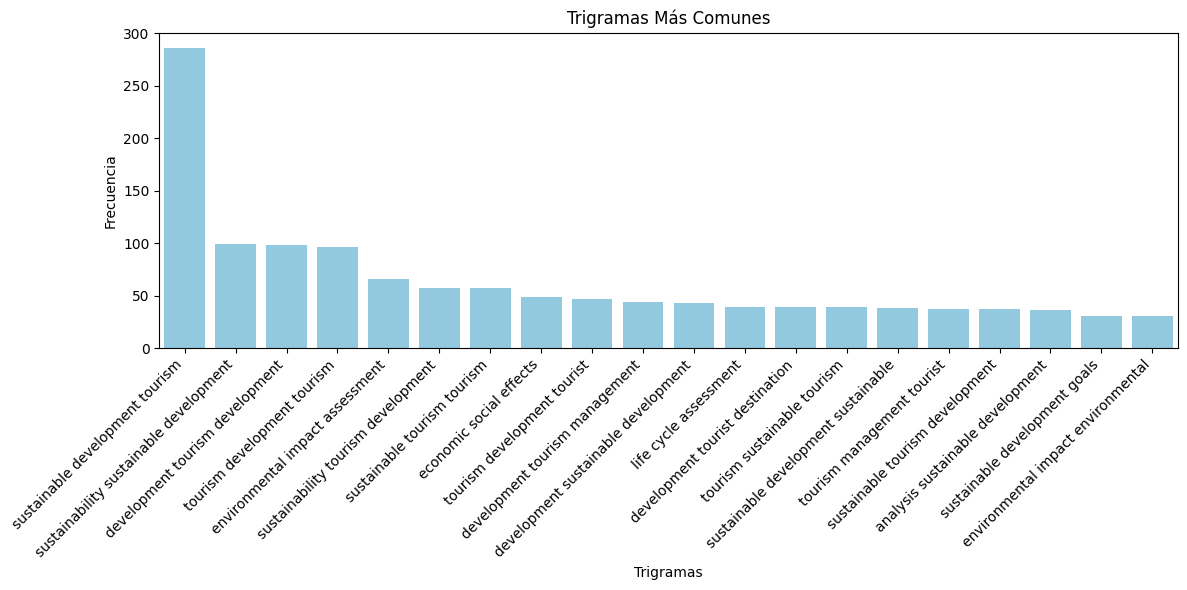

In [22]:

# Crear el vectorizador para trigramas
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
X = vectorizer.fit_transform(df_reduced['Keywords'])

# Obtener los trigramas más frecuentes
trigram_counts = X.toarray().sum(axis=0)
trigrams = vectorizer.get_feature_names_out()
df_trigrams = pd.DataFrame({'Trigramas': trigrams, 'Frecuencia': trigram_counts})
df_trigrams = df_trigrams.sort_values(by='Frecuencia', ascending=False).head(20)  # Top 20 trigramas

# Graficar los trigramas más comunes
plt.figure(figsize=(12, 6))
sns.barplot(data=df_trigrams, x='Trigramas', y='Frecuencia', color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Trigramas")
plt.ylabel("Frecuencia")
plt.title("Trigramas Más Comunes")
plt.tight_layout()
plt.show()



##### Observación General

El gráfico de trigramas muestra combinaciones de tres palabras clave que ocurren con mayor frecuencia en los resúmenes de los artículos analizados. A continuación, se destacan algunas de las combinaciones más relevantes:

1.  **Principales Temáticas**: Los trigramas que más destacan están relacionados con términos como _“sustainable development tourism”_, _“sustainability sustainable development”_, y _“development tourism development”_. Esto indica una fuerte correlación en los estudios entre el turismo y el desarrollo sostenible, así como el impacto de la sostenibilidad en el ámbito turístico.
    
2.  **Impacto Medioambiental**: Otro trigrama notable es _“environmental impact assessment”_, lo que sugiere un enfoque en evaluar cómo el turismo y el desarrollo afectan al medio ambiente. Estos estudios probablemente se enfocan en medir y mitigar los efectos negativos del turismo sobre la naturaleza.
    
3.  **Efectos Económicos y Sociales**: La combinación _“economic social effects”_ destaca en el análisis, lo que indica que una parte considerable de los estudios se centra en los efectos económicos y sociales que el turismo sostenible tiene en diferentes comunidades y regiones.
    
4.  **Otros Trigramas Relevantes**: Observamos también trigramas como _“tourism development management”_, _“life cycle assessment”_ y _“sustainable development goals”_, que sugieren estudios sobre la gestión del turismo, la evaluación del ciclo de vida en proyectos de desarrollo y el cumplimiento de objetivos de desarrollo sostenible (ODS).
    

##### Implicaciones para la Investigación

Este análisis de trigramas ayuda a identificar áreas específicas dentro del turismo y la sostenibilidad que están siendo exploradas con mayor profundidad:

*   **Gestión Sostenible del Turismo**: Hay un enfoque marcado en la gestión y el desarrollo del turismo de una manera sostenible.
    
*   **Evaluación de Impacto**: La evaluación de impacto, especialmente en términos ambientales y sociales, es una preocupación central en la investigación.
    
*   **Ciclo de Vida y ODS**: Existen estudios enfocados en evaluar el ciclo de vida de los proyectos y en alinearse con los Objetivos de Desarrollo Sostenible.

## FASE 3 - DESARROLLO DEL RNN

inicio